<a href="https://colab.research.google.com/github/HarryWallrus/CHEG_672_misc_work/blob/main/Week_2_Worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the dataset.

In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the dataset
file_name = "Biomass Gasification Dataset.xlsx"  # Replace with your actual file name
df = pd.read_excel(file_name)

# Display the first few rows of the dataset
df.head()

Saving Biomass Gasification Dataset.xlsx to Biomass Gasification Dataset.xlsx


,feed,Type of Feed,C,H,N,S,O,ASH,C-H Aromatics,C-H Alkanes,...,Time,BC,Reactor,Catalyst Type,Catalyst Concentration,CO2 mole fraction,H2 mole fraction,Hydrogen selectivity,CO mole fraction,CH4 mole fraction
0,Fruit Waste,Orange Peel,41.71,6.04,1.91,0.0,50.34,0.0,1,1,...,30,5.0,Batch,0,0.0,92.37,1.54,1.564087,5.65,0.42
1,Fruit Waste,Orange Peel,41.71,6.04,1.91,0.0,50.34,0.0,1,1,...,60,5.0,Batch,0,0.0,93.00,2.49,2.553584,4.18,0.33
2,Fruit Waste,Orange Peel,41.71,6.04,1.91,0.0,50.34,0.0,1,1,...,30,15.0,Batch,0,0.0,92.50,2.00,2.040816,4.50,1.00
3,Fruit Waste,Orange Peel,41.71,6.04,1.91,0.0,50.34,0.0,1,1,...,60,15.0,Batch,0,0.0,95.27,1.09,1.102012,2.62,1.00
4,Fruit Waste,Orange Peel,41.71,6.04,1.91,0.0,50.34,0.0,1,1,...,45,10.0,Batch,0,0.0,95.35,0.97,0.979501,3.23,0.45


In [ ]:
import pandas as pd

# Replace '/path/to/your/file.xlsx' with the actual file path
file_path = '/content/Biomass Gasification Dataset.xlsx'

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_path)

# Print the first few rows of the DataFrame to verify
print(df.head())

          feed Type of Feed      C     H     N    S      O  ASH  \
0  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
1  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
2  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
3  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
4  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   

   C-H Aromatics   C-H  Alkanes  ...  Time    BC  Reactor  Catalyst Type  \
0               1             1  ...    30   5.0    Batch              0   
1               1             1  ...    60   5.0    Batch              0   
2               1             1  ...    30  15.0    Batch              0   
3               1             1  ...    60  15.0    Batch              0   
4               1             1  ...    45  10.0    Batch              0   

   Catalyst Concentration  CO2 mole fraction  H2 mole fraction  \
0                     0.0              92.37              1.54   
1       

Number of rows and columns in the dataset.

In [ ]:
# Get the number of rows and columns in the DataFrame
num_rows, num_cols = df.shape

# Print the results
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 244
Number of columns: 25


Identifying the types of data present, and which columns are numeric and which are categorical.

In [ ]:
# Get the data types of each column
data_types = df.dtypes

# Print the results
print("Data types:\n")
print(data_types)

# Identify numeric columns (integer and float)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (object)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("\nNumeric columns:", numeric_columns)
print("\nCategorical columns:", categorical_columns)

Data types:

feed                       object
Type of Feed               object
C                         float64
H                         float64
N                         float64
S                         float64
O                         float64
ASH                       float64
C-H Aromatics               int64
C-H  Alkanes                int64
C-O                         int64
C=C                         int64
C=O                         int64
O-H                         int64
Temp                        int64
Time                        int64
BC                        float64
Catalyst Type              object
Catalyst Concentration    float64
CO2 mole fraction         float64
H2 mole fraction          float64
Hydrogen selectivity      float64
CO mole fraction          float64
CH4 mole fraction         float64
C-to-H ratio              float64
O-to-H ratio              float64
dtype: object

Numeric columns: ['C', 'H', 'N', 'S', 'O', 'ASH', 'C-H Aromatics ', 'C-H  Alkanes', 'C-O

Checking for missing values. (result: there are none)

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing data
print("Columns with missing values:\n")
print(missing_values[missing_values > 0])

Columns with missing values:

Series([], dtype: int64)


The column representing the the types of biomass feed is column B "Type of Feed".

Listing the types of feed present in the dataset (under the column "feed").

In [ ]:
# List unique feed types in Column A "feed"
feed_types = df["feed"].unique()

# Print the unique feed types
print("feed types:")
print(feed_types)

feed types:
['Fruit Waste' 'Plastic Waste' 'Agri. Residue'
 'Residue of Biodisel Production' 'Microalgae residue fron Biodisel'
 'Waste of Wood and Paper' 'Waste Water' 'Waste']


Comparing the average chemical compositions of different feed types and displaying them for comparison.

In [ ]:
# Assuming your DataFrame is named 'df'
grouped_data = df.groupby("feed")
mean_values = grouped_data[["C", "H", "N", "S", "O", "ASH"]].mean()

print("Mean composition for each feed type:")
print(mean_values)

Mean composition for each feed type:
                                          C         H         N         S  \
feed                                                                        
Agri. Residue                     44.100000  6.000000  0.400000  0.010000   
Fruit Waste                       41.508846  6.031923  1.921923  0.005769   
Microalgae residue fron Biodisel  54.533333  7.000000  9.466667  0.533333   
Plastic Waste                     60.820000  4.220000  0.000000  0.000000   
Residue of Biodisel Production    39.100000  8.700000  0.000000  0.000000   
Waste                             41.200000  6.710000  1.470000  0.000000   
Waste Water                       32.256897  4.999310  5.307241  0.022414   
Waste of Wood and Paper           40.123250  4.911250  1.427500  1.644000   

                                          O       ASH  
feed                                                   
Agri. Residue                     45.100000  0.000000  
Fruit Waste             

Determining the temperature range used in the biomass gasification experiments.

In [ ]:
# Calculate the minimum, maximum, and average temperature values
min_temp = df["Temp"].min()
max_temp = df["Temp"].max()
avg_temp = df["Temp"].mean()

# Print the results
print("Minimum Temperature:", min_temp)
print("Maximum Temperature:", max_temp)
print("Average Temperature:", avg_temp)

Minimum Temperature: 80
Maximum Temperature: 400
Average Temperature: 369.36475409836066


The column that is irrelevant to the task is Column R "Reactor" because all entries in the column are identical. It can be dropped so the code / machine has one less column to look at.

In [ ]:
# Delete Column R "Reactor"
df.drop("Reactor", axis=1, inplace=True)

# Check if the column has been deleted
if "Reactor" not in df.columns:
    print("Column 'Reactor' has been deleted successfully.")
else:
    print("Column 'Reactor' still exists.")

Column 'Reactor' has been deleted successfully.


Create a new column for the C-to-H ratios of each feed type

In [ ]:
# Assuming your DataFrame is named 'df'
df["C-to-H ratio"] = df["C"] / df["H"]

# Check if the new column has been added
print(df.columns)

Index(['feed', 'Type of Feed', 'C', 'H', 'N', 'S', 'O', 'ASH',
       'C-H Aromatics ', 'C-H  Alkanes', 'C-O ', 'C=C ', 'C=O ', 'O-H ',
       'Temp', 'Time', 'BC', 'Catalyst Type', 'Catalyst Concentration',
       'CO2 mole fraction', 'H2 mole fraction', 'Hydrogen selectivity',
       'CO mole fraction', 'CH4 mole fraction', 'C-to-H ratio'],
      dtype='object')


Create a new column for the O-to-H ratios of each feed type

In [ ]:
# Assuming your DataFrame is named 'df'
df["O-to-H ratio"] = df["O"] / df["H"]

# Check if the new column has been added
print(df.columns)

Index(['feed', 'Type of Feed', 'C', 'H', 'N', 'S', 'O', 'ASH',
       'C-H Aromatics ', 'C-H  Alkanes', 'C-O ', 'C=C ', 'C=O ', 'O-H ',
       'Temp', 'Time', 'BC', 'Catalyst Type', 'Catalyst Concentration',
       'CO2 mole fraction', 'H2 mole fraction', 'Hydrogen selectivity',
       'CO mole fraction', 'CH4 mole fraction', 'C-to-H ratio',
       'O-to-H ratio'],
      dtype='object')


Ranges of the C-to-H ratios for different feeds

In [ ]:
# Assuming your DataFrame is named 'df'
grouped_data = df.groupby("feed")

# Calculate minimum, maximum, and average values for each feed type
min_ratio = grouped_data["C-to-H ratio"].min()
max_ratio = grouped_data["C-to-H ratio"].max()
avg_ratio = grouped_data["C-to-H ratio"].mean()

# Print the results
print("Minimum C-to-H ratio for each feed type:")
print(min_ratio)

print("Maximum C-to-H ratio for each feed type:")
print(max_ratio)

print("Average C-to-H ratio for each feed type:")
print(avg_ratio)

Minimum C-to-H ratio for each feed type:
feed
Agri. Residue                        7.350000
Fruit Waste                          6.267007
Microalgae residue fron Biodisel     7.352113
Plastic Waste                       14.412322
Residue of Biodisel Production       4.494253
Waste                                6.140089
Waste Water                          5.232598
Waste of Wood and Paper              7.895904
Name: C-to-H ratio, dtype: float64
Maximum C-to-H ratio for each feed type:
feed
Agri. Residue                        7.350000
Fruit Waste                          6.905629
Microalgae residue fron Biodisel     8.523077
Plastic Waste                       14.412322
Residue of Biodisel Production       4.494253
Waste                                6.140089
Waste Water                          7.065708
Waste of Wood and Paper              8.451306
Name: C-to-H ratio, dtype: float64
Average C-to-H ratio for each feed type:
feed
Agri. Residue                        7.350000
Fruit Wast

Ranges of the O-to-H ratios of different feeds

In [ ]:
# Assuming your DataFrame is named 'df'
grouped_data = df.groupby("feed")

# Calculate minimum, maximum, and average values for each feed type
min_ratio = grouped_data["O-to-H ratio"].min()
max_ratio = grouped_data["O-to-H ratio"].max()
avg_ratio = grouped_data["O-to-H ratio"].mean()

# Print the results
print("Minimum O-to-H ratio for each feed type:")
print(min_ratio)

print("Maximum O-to-H ratio for each feed type:")
print(max_ratio)

print("Average O-to-H ratio for each feed type:")
print(avg_ratio)

Minimum O-to-H ratio for each feed type:
feed
Agri. Residue                       7.516667
Fruit Waste                         8.334437
Microalgae residue fron Biodisel    3.675676
Plastic Waste                       7.402844
Residue of Biodisel Production      6.000000
Waste                               6.426230
Waste Water                         5.176570
Waste of Wood and Paper             7.764505
Name: O-to-H ratio, dtype: float64
Maximum O-to-H ratio for each feed type:
feed
Agri. Residue                        7.516667
Fruit Waste                          9.326531
Microalgae residue fron Biodisel     4.521127
Plastic Waste                        7.402844
Residue of Biodisel Production       6.000000
Waste                                6.426230
Waste Water                         10.975359
Waste of Wood and Paper             13.448931
Name: O-to-H ratio, dtype: float64
Average O-to-H ratio for each feed type:
feed
Agri. Residue                        7.516667
Fruit Waste       

applying one-hot encoding to the column "Type of Feed" to make it more suitable for machine learning.

In [ ]:
# Assuming your DataFrame is named 'df'

# Check if the column exists
if "Type of Feed" in df.columns:
    # Apply one-hot encoding if the column exists
    df_encoded = pd.get_dummies(df, columns=["Type of Feed"])
else:
    print("Error: 'Type of Feed' column not found.")

# Display the first few rows of the encoded dataset
print(df_encoded.head())

          feed      C     H     N    S      O  ASH  C-H Aromatics   \
0  Fruit Waste  41.71  6.04  1.91  0.0  50.34  0.0               1   
1  Fruit Waste  41.71  6.04  1.91  0.0  50.34  0.0               1   
2  Fruit Waste  41.71  6.04  1.91  0.0  50.34  0.0               1   
3  Fruit Waste  41.71  6.04  1.91  0.0  50.34  0.0               1   
4  Fruit Waste  41.71  6.04  1.91  0.0  50.34  0.0               1   

   C-H  Alkanes  C-O   ...  Type of Feed_Dunalila salina- CGLY 4%  \
0             1     1  ...                                  False   
1             1     1  ...                                  False   
2             1     1  ...                                  False   
3             1     1  ...                                  False   
4             1     1  ...                                  False   

   Type of Feed_Dunalila salina- Dionized Water  \
0                                         False   
1                                         False   
2          

In [ ]:
# Get the number of rows and columns in the DataFrame
num_rows, num_cols = df.shape

# Print the results
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 244
Number of columns: 26


After one-hot encoding, about 23 new columns have been created for the "Type of Feed" variable

Examining the gas mole fractions for outliers in the data.

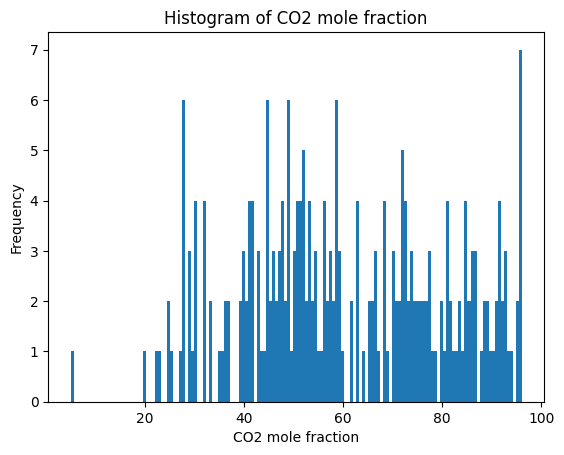

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a histogram
plt.hist(df["CO2 mole fraction"], bins=150)  # Adjust the number of bins as needed
plt.xlabel("CO2 mole fraction")
plt.ylabel("Frequency")
plt.title("Histogram of CO2 mole fraction")
plt.show()

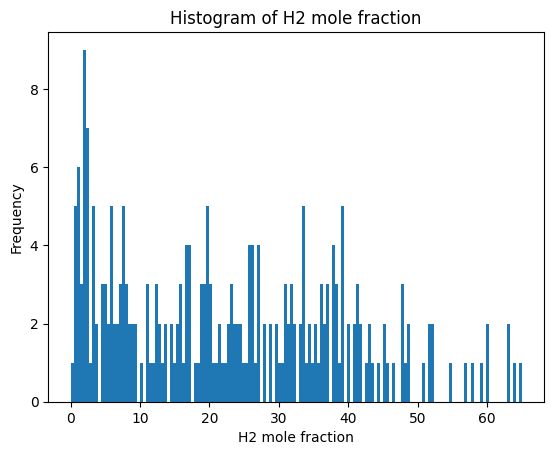

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a histogram
plt.hist(df["H2 mole fraction"], bins=150)  # Adjust the number of bins as needed
plt.xlabel("H2 mole fraction")
plt.ylabel("Frequency")
plt.title("Histogram of H2 mole fraction")
plt.show()

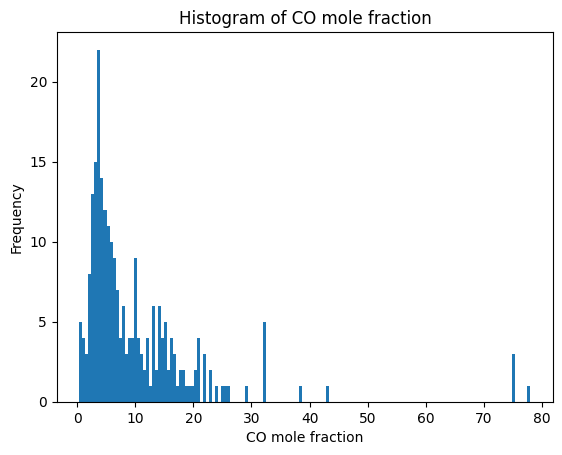

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a histogram
plt.hist(df["CO mole fraction"], bins=150)  # Adjust the number of bins as needed
plt.xlabel("CO mole fraction")
plt.ylabel("Frequency")
plt.title("Histogram of CO mole fraction")
plt.show()

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Calculate statistics for each column and group the results
stats = df[["CO2 mole fraction", "H2 mole fraction", "CO mole fraction"]].describe().T

# Print the results
print("Statistics for each column:")
print(stats)

Statistics for each column:
                   count       mean        std   min     25%     50%      75%  \
CO2 mole fraction  244.0  60.397418  20.341010  5.00  45.245  58.025  77.0375   
H2 mole fraction   244.0  22.881787  16.443818  0.00   7.460  21.155  35.3600   
CO mole fraction   244.0  10.195082  11.261567  0.39   3.885   6.435  13.1900   

                     max  
CO2 mole fraction  96.01  
H2 mole fraction   65.00  
CO mole fraction   78.00  


There are some high outliers in CO and H2, and some low outliers in CO2. They can be identified by Z-scoring and then dropped.

In [ ]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'

# Calculate Z-scores for the "CO mole fraction" column
z_scores = (df["CO mole fraction"] - df["CO mole fraction"].mean()) / df["CO mole fraction"].std()

# Set a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 2

# Identify outlier indices
outlier_indices = z_scores[(z_scores > threshold) | (z_scores < -threshold)].index

# Remove outliers from the DataFrame
df = df.drop(outlier_indices, axis=0)

# Check if outliers were successfully removed
print("Outliers removed:", len(outlier_indices))
print("New shape of the DataFrame:", df.shape)

Outliers removed: 6
New shape of the DataFrame: (238, 26)


In [ ]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'

# Calculate Z-scores for the "CO2 mole fraction" column
z_scores = (df["CO2 mole fraction"] - df["CO2 mole fraction"].mean()) / df["CO2 mole fraction"].std()

# Set a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 2

# Identify outlier indices
outlier_indices = z_scores[(z_scores > threshold) | (z_scores < -threshold)].index

# Remove outliers from the DataFrame
df = df.drop(outlier_indices, axis=0)

# Check if outliers were successfully removed
print("Outliers removed:", len(outlier_indices))
print("New shape of the DataFrame:", df.shape)

Outliers removed: 1
New shape of the DataFrame: (237, 26)


In [ ]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'

# Calculate Z-scores for the "H2 mole fraction" column
z_scores = (df["H2 mole fraction"] - df["H2 mole fraction"].mean()) / df["H2 mole fraction"].std()

# Set a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 2

# Identify outlier indices
outlier_indices = z_scores[(z_scores > threshold) | (z_scores < -threshold)].index

# Remove outliers from the DataFrame
df = df.drop(outlier_indices, axis=0)

# Check if outliers were successfully removed
print("Outliers removed:", len(outlier_indices))
print("New shape of the DataFrame:", df.shape)

Outliers removed: 8
New shape of the DataFrame: (229, 26)


Plot a histogram for the temperature. The distribution indicates that the gasification is most effective at temperatures upwards of 300 degrees (temperature scale not given).

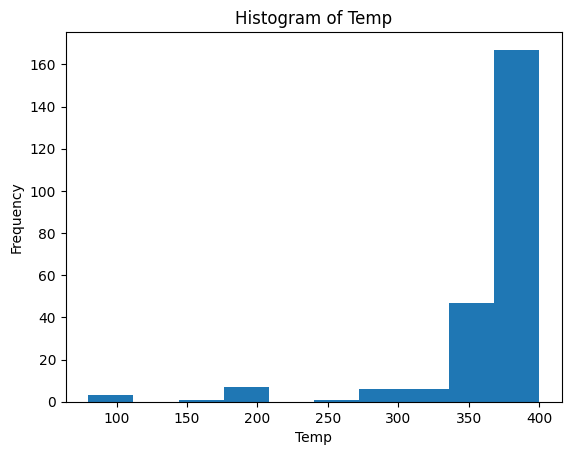

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a histogram
plt.hist(df["Temp"], bins=10)  # Adjust the number of bins as needed
plt.xlabel("Temp")
plt.ylabel("Frequency")
plt.title("Histogram of Temp")
plt.show()

Investigate the correlation between temperature and the CO2 mole fraction: The correlation coefficient ~ -0.316 indicates a somewhat negative correlation. Lower values of CO2 mole fraction appear more frequently at the high end of experiment temperatues (400 degrees).

Correlation between Temp and CO2 mole fraction: -0.31631684171953145


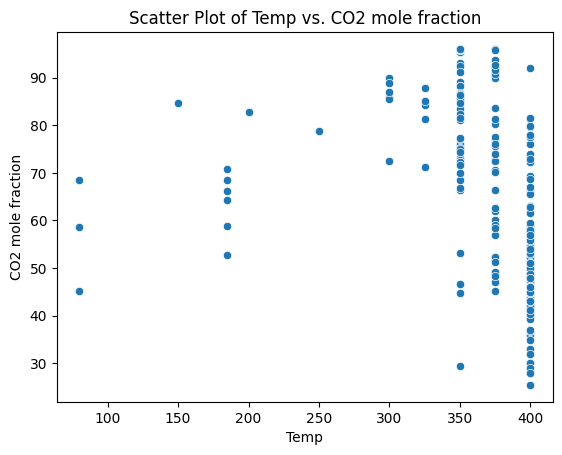

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Calculate the correlation coefficient
correlation = df["Temp"].corr(df["CO2 mole fraction"])

# Print the correlation coefficient
print("Correlation between Temp and CO2 mole fraction:", correlation)

# Create a scatter plot to visualize the relationship
sns.scatterplot(x="Temp", y="CO2 mole fraction", data=df)
plt.title("Scatter Plot of Temp vs. CO2 mole fraction")
plt.xlabel("Temp")
plt.ylabel("CO2 mole fraction")
plt.show()

Visualize the relationship between carbon content in the feed and hydrogen selectivity. Hydrogen selectivity consistently is below 80, and the only exception to this appearing within the range carbon content of ~35-40 (note: these points appear ALONG WITH the hydrogen selectvity values below 80 in this same carbon content range, NOT in place of them).

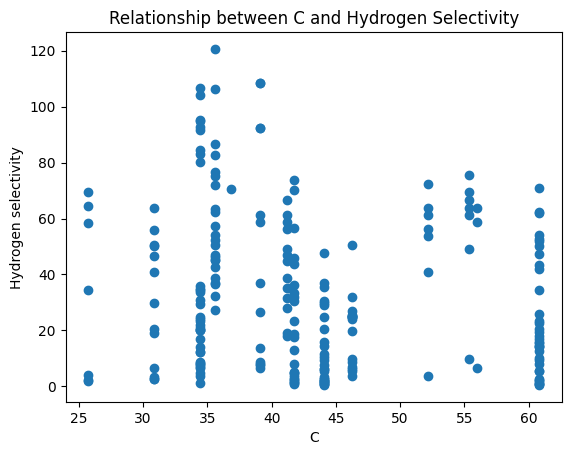

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a scatter plot
plt.scatter(df["C"], df["Hydrogen selectivity"])
plt.xlabel("C")
plt.ylabel("Hydrogen selectivity")
plt.title("Relationship between C and Hydrogen Selectivity")
plt.show()

Plot the CO mole fraction versus the H2  mole fraction. Based on the scatter plot, higher CO levels do not correspond to lower hydrogen levels.

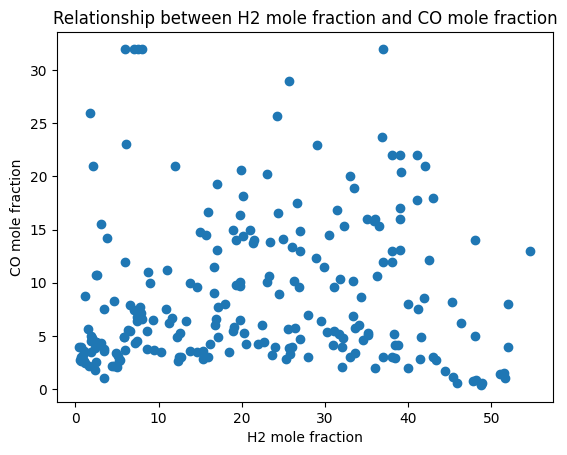

In [ ]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Create a scatter plot
plt.scatter(df["H2 mole fraction"], df["CO mole fraction"])
plt.xlabel("H2 mole fraction")
plt.ylabel("CO mole fraction")
plt.title("Relationship between H2 mole fraction and CO mole fraction")
plt.show()

Split the dataset into features (X) and target variables (Y). The Y variables are "CO2 mole fraction", "H2 mole fraction", "Hydrogen selectivity", "CO mole fraction", and "CH4 mole fraction".

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Define the target variables
target_cols = ["CO2 mole fraction", "H2 mole fraction", "Hydrogen selectivity", "CO mole fraction", "CH4 mole fraction"]

# Split the DataFrame into features (X) and target variables (Y)
X = df.drop(target_cols, axis=1)
Y = df[target_cols]

print("Features (X):")
print(X.head())

print("Target variables (Y):")
print(Y.head())

Features (X):
          feed Type of Feed      C     H     N    S      O  ASH  \
0  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
1  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
2  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
3  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
4  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   

   C-H Aromatics   C-H  Alkanes  ...  C=C   C=O   O-H   Temp  Time    BC  \
0               1             1  ...     1     1     1   350    30   5.0   
1               1             1  ...     1     1     1   350    60   5.0   
2               1             1  ...     1     1     1   350    30  15.0   
3               1             1  ...     1     1     1   350    60  15.0   
4               1             1  ...     1     1     1   350    45  10.0   

   Catalyst Type Catalyst Concentration  C-to-H ratio  O-to-H ratio  
0              0                    0.0      6.905629   